## Моделлирование цепей Маркова
Работу выполнили:
- Казаков Андрей
- Обиджанов Алишер
- Кузнецов Павел

### Рассматриваемая цепь
![Рассматриваемая цепь](chain.png)

In [112]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)
rnjesus = np.random.default_rng(42)

p = np.genfromtxt("./probability_matrix.csv", delimiter=",")
n = p.shape[0]
EPSILON = 1e-9
K=100
s0 = np.full(n, 1 / n)
s1 = rnjesus.dirichlet(np.ones(n))
print(f"p:\n{p}")
print(f"S_0 = {s0}, Sum = {s0.sum()}")
print(f"S_1 = {s1}, Sum = {s1.sum():.3f}")

p:
[[0.1  0.5  0.   0.   0.2  0.   0.   0.2 ]
 [0.3  0.2  0.   0.5  0.   0.   0.   0.  ]
 [0.   0.   0.3  0.   0.   0.   0.7  0.  ]
 [0.25 0.2  0.   0.4  0.   0.   0.   0.15]
 [0.1  0.   0.   0.2  0.5  0.   0.   0.2 ]
 [0.   0.   0.4  0.   0.   0.6  0.   0.  ]
 [0.1  0.   0.   0.15 0.   0.05 0.7  0.  ]
 [0.   0.1  0.   0.1  0.   0.   0.   0.8 ]]
S_0 = [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125], Sum = 1.0
S_1 = [0.178 0.173 0.177 0.021 0.006 0.108 0.105 0.232], Sum = 1.000


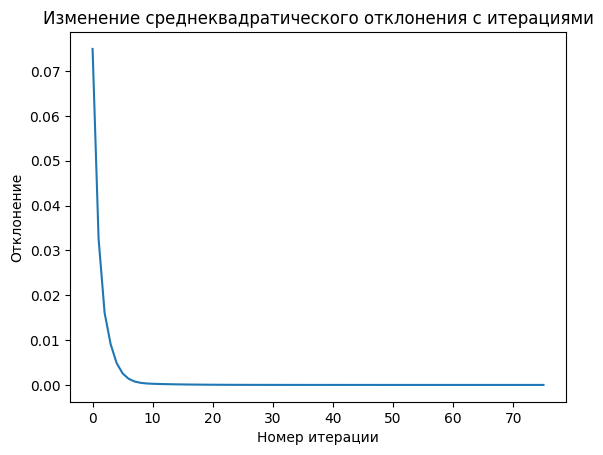

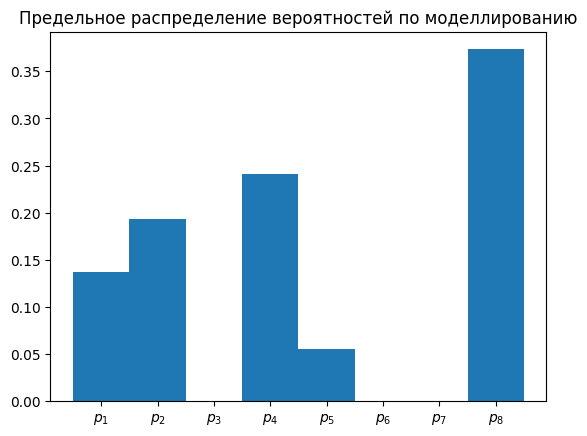

In [113]:
s0_step = s0.copy()
s1_step = s1.copy()
std_steps = [(s0 - s1).std()]

for _ in range(100):
    s0_step @= p
    s1_step @= p

    error = (s0_step - s1_step).std()
    std_steps.append(error)
    if error < EPSILON:
        break

plt.plot(std_steps)
plt.title("Изменение среднеквадратического отклонения с итерациями")
plt.xlabel("Номер итерации")
plt.ylabel("Отклонение")
plt.show()

plt.title("Предельное распределение вероятностей по моделлированию")
plt.stairs(s0_step, fill=True)
plt.xticks(np.fromiter((i + 0.5 for i in range(n)), float), (f"$p_{i}$" for i in range(1, n + 1)))
plt.show()

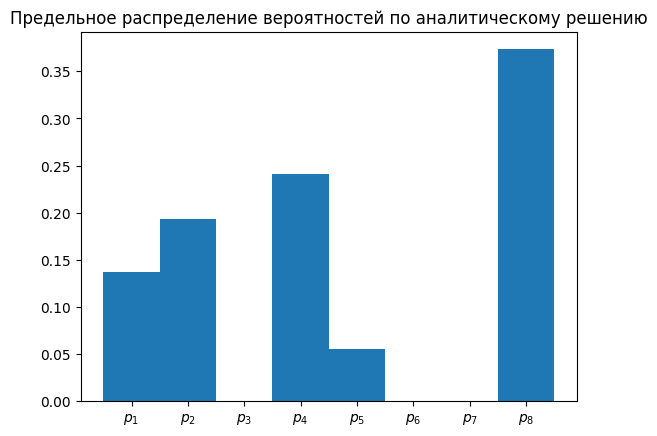

Среднеквадратическое отклонение векторов полученных двумя способами: 6.850232801370258e-08


In [114]:
a = p.T - np.eye(n)
a[0] = 1
b = np.hstack((np.ones(1), np.zeros(n - 1)))
x = np.linalg.solve(a, b)

plt.title("Предельное распределение вероятностей по аналитическому решению")
plt.stairs(x, fill=True)
plt.xticks(np.fromiter((i + 0.5 for i in range(n)), float), (f"$p_{i}$" for i in range(1, n + 1)))
plt.show()

print(f"Среднеквадратическое отклонение векторов полученных двумя способами: {(s0_step - x).std()}")